# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [5]:
# imports
!pip install panel
!pip install plotly
!pip install hvplot
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

  Using cached holoviews-1.14.5-py3-none-any.whl (4.3 MB)
  Using cached colorcet-2.0.6-py2.py3-none-any.whl (1.6 MB)


In [6]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [7]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [14]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
housing_units_per_year = sfo_data[["housing_units"]]
mean_housing_units = housing_units_per_year.groupby('year').mean()
mean_housing_units

housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242

In [9]:
# Save the dataframe as a csv file
# YOUR CODE HERE!
mean_housing_units.to_csv('mean_housing_units.csv')

In [10]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!
mean_housing_units.hvplot.bar(ylim=(370000, 387500)).opts(yformatter="%.0f")
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

:Bars   [year]   (housing_units)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [13]:
# Calculate the average sale price per square foot and average gross rent
# YOUR CODE HERE!
avg_gross_rent = sfo_data[["gross_rent"]]
combined_units = avg_gross_rent.groupby('year').mean()
combined_units

gross_rent
year            
2010        1239
2011        1530
2012        2324
2013        2971
2014        3528
2015        3739
2016        4390

In [17]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
# YOUR CODE HERE!
avg_gross_sqft = sfo_data[["sale_price_sqr_foot"]]
combined_sqft = avg_gross_sqft.groupby('year').mean()
combined_sqft

# Line chart for average montly rent
# YOUR CODE HERE!
combined_lines = avg_gross_rent.hvplot.line() + combined_sqft.hvplot.line()
combined_lines

:Layout
   .Curve.I  :Curve   [year]   (gross_rent)
   .Curve.II :Curve   [year]   (sale_price_sqr_foot)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [18]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!
neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean()
neighborhood.head(10)

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239
     Central Sunset             418.172493         372560        1239
     Corona Heights             369.359338         372560        1239
     Cow Hollow                 569.379968         372560        1239
     Croker Amazon              165.645730         372560        1239
     Diamond Heights            456.930822         372560        1239

In [19]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
neighborhood.hvplot.line(
    x='year',
    y='sale_price_sqr_foot',
    groupby='neighborhood',
    xlabel="Year",
    ylabel="Avg Sale Price per Square Foot",
    width=600, height=250)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [20]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
neighborhood.hvplot.line(
    x='year',
    y='gross_rent',
    groupby='neighborhood',
    xlabel="Year",
    ylabel="Avg Gross Rent per Year",
    width=600, height=250)

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [21]:
# Getting the data from the top 10 expensive neighborhoods to own
# YOUR CODE HERE!
neighborhood_sales = sfo_data.groupby(["neighborhood"], as_index=False).mean()
top_ten = neighborhood_sales.nlargest(10,"sale_price_sqr_foot").round(2)
top_ten

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
65  Union Square District               903.99      377427.50     2555.17
36         Merced Heights               788.84      380348.00     3414.00
38          Miraloma Park               779.81      375967.25     2155.25
51        Pacific Heights               689.56      378401.00     2817.29
71          Westwood Park               687.09      382295.00     3959.00
63         Telegraph Hill               676.51      378401.00     2817.29
57       Presidio Heights               675.35      378401.00     2817.29
10             Cow Hollow               665.96      378401.00     2817.29
56           Potrero Hill               662.01      378401.00     2817.29
60            South Beach               650.12      375805.00     2099.00

In [22]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
top_ten.hvplot.bar(x='neighborhood',
                  y='sale_price_sqr_foot',
                  rot=70,
                  title= "Top Ten Expensive Neighborhoods",
                  xlabel= "Neighborhood",
                  ylabel= "Sale Price per Square Foot",
                  width=500, height=300)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [23]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
# YOUR CODE HERE!
neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean()
neighborhood.head(10)

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239
     Central Sunset             418.172493         372560        1239
     Corona Heights             369.359338         372560        1239
     Cow Hollow                 569.379968         372560        1239
     Croker Amazon              165.645730         372560        1239
     Diamond Heights            456.930822         372560        1239

In [24]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
top_ten.hvplot.bar(x="neighborhood",
                y=["gross_rent", "sale_price_sqr_foot"],
                title= "Top Ten Expensive Neighborhoods",
                height=400,
                rot=90)

:Bars   [neighborhood,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [28]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [29]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

px.set_mapbox_access_token(map_box_api)
avg_value_per_neighborhood = sfo_data.groupby([sfo_data["neighborhood"]]).mean()
avg_value_per_neighborhood = avg_value_per_neighborhood.reset_index()
avg_value_per_neighborhood.head(10)



neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0       Alamo Square           366.020712       378401.0  2817.285714
1         Anza Vista           373.382198       379050.0  3031.833333
2            Bayview           204.588623       376454.0  2318.400000
3    Bayview Heights           590.792839       382295.0  3739.000000
4    Bernal Heights            576.746488       379374.5  3080.333333
5   Buena Vista Park           452.680591       378076.5  2698.833333
6   Central Richmond           394.422399       378401.0  2817.285714
7     Central Sunset           423.687928       378401.0  2817.285714
8  Clarendon Heights           487.244886       376454.0  2250.500000
9     Corona Heights           587.539067       377232.8  2472.000000

In [30]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!
avg_value_location = pd.concat([avg_value_per_neighborhood, df_neighborhood_locations], axis="columns", join="inner")
avg_value_location.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent  \
0     Alamo Square           366.020712       378401.0  2817.285714   
1       Anza Vista           373.382198       379050.0  3031.833333   
2          Bayview           204.588623       376454.0  2318.400000   
3  Bayview Heights           590.792839       382295.0  3739.000000   
4  Bernal Heights            576.746488       379374.5  3080.333333   

      Neighborhood        Lat         Lon  
0     Alamo Square  37.791012 -122.402100  
1       Anza Vista  37.779598 -122.443451  
2          Bayview  37.734670 -122.401060  
3  Bayview Heights  37.728740 -122.410980  
4   Bernal Heights  37.728630 -122.443050

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

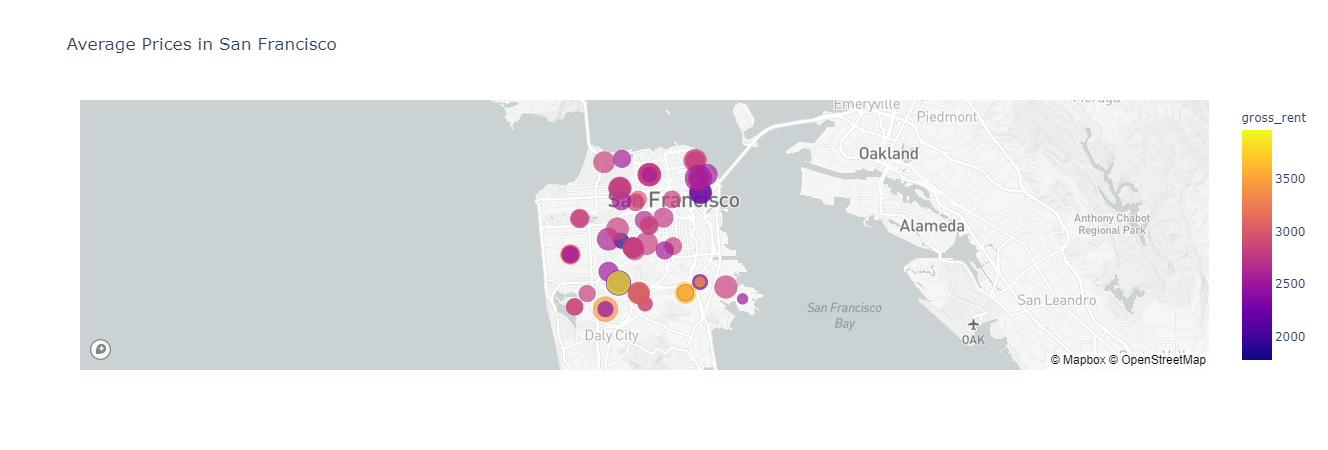

In [33]:
# Set the mapbox access token
# YOUR CODE HERE!
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    avg_value_location,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    zoom=10,
    title="Average Prices in San Francisco"
)

map_plot.show()
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
7   2010        Cow Hollow           569.379968         372560        1239
31  2010     Miraloma Park           680.608729         372560        1239
41  2010   Pacific Heights           496.516014         372560        1239
46  2010      Potrero Hill           491.450004         372560        1239
47  2010  Presidio Heights           549.417931         372560        1239

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


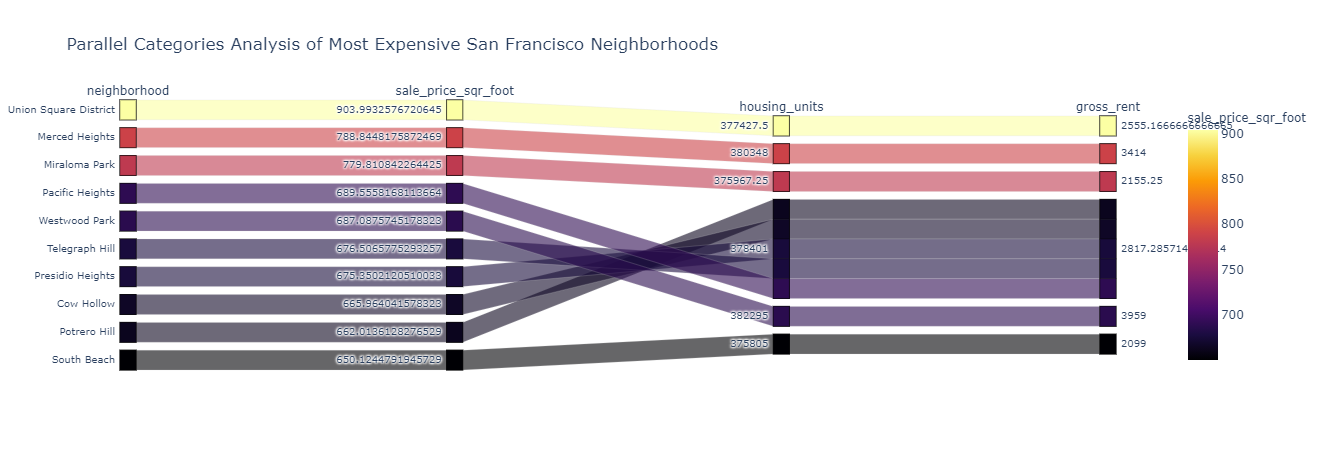

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

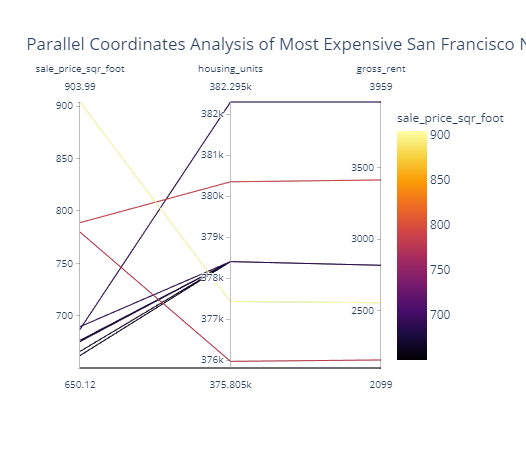

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

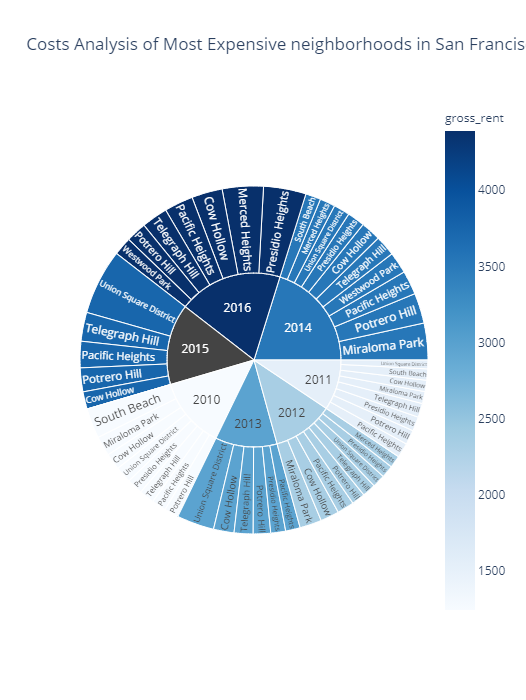

In [23]:
# Sunburst Plot
# YOUR CODE HERE!